# 0. Importação de bibliotecas e Leitura das bases

In [1]:
import geopandas as gpd # Leitura e manipulação de dados
import seaborn as sns # Gráficos
import matplotlib.pyplot as plt # Gráficos 

In [2]:
cnuc = gpd.read_file("areas-PA/areas-de-interesse/cnuc/cnuc_pa_dados.shp")
quilombola = gpd.read_file("areas-PA/areas-de-interesse/quilombola/quilombola_pa_dados.shp")
tis = gpd.read_file("areas-PA/areas-de-interesse/tis/tis_pa_dados.shp")

In [3]:
print("CNUC: {}, Quilombola: {}, TIS: {}".format(cnuc.shape[0], quilombola.shape[0], tis.shape[0]))

CNUC: 96, Quilombola: 84, TIS: 51


In [4]:
cnuc.sample(5)

,nome_uc,ha_total,uf,municipio,situacao,a_sigef,c_sigef,a_alertas,c_alertas,geometry
92,RESERVA EXTRATIVISTA GURUPÁ-MELGAÇO,145408.55,PARÁ,"gurupa , melgaco",Ativo,9.433017e+08,35,697296.97,45,"POLYGON ((-51.00466 -1.11907, -51.00357 -1.119..."
2,PARQUE NACIONAL DA SERRA DO PARDO,445391.95,PARÁ,"altamira , sao felix do xingu",Ativo,1.355761e+09,60,5655743.90,94,"POLYGON ((-53.44312 -5.68107, -53.44488 -5.676..."
33,RESERVA DE DESENVOLVIMENTO SUSTENTÁVEL PUCURUÍ...,29165.19,PARÁ,"novo repartimento , tucurui",Ativo,1.381425e+08,99,1104226.19,24,"POLYGON ((-49.72754 -3.9913, -49.72696 -3.9920..."
35,RESERVA BIOLÓGICA DE MAICURU,1173135.93,PARÁ,"almeirim , monte alegre",Ativo,2.152177e+08,4,619893.96,11,"POLYGON ((-54.62402 1.35209, -54.62402 1.3521,..."
76,RESERVA EXTRATIVISTA MÃE GRANDE DE CURUÇÁ,36827.83,PARÁ,curuca,Ativo,3.048845e+06,42,8231.37,1,"POLYGON ((-47.88187 -0.53614, -47.88112 -0.536..."


In [5]:
quilombola.sample(5)

,nm_comunid,nm_municip,nr_familia,nr_area_ha,a_sigef,c_sigef,a_alertas,c_alertas,geometry
43,Amarqualta - Parte Incra,acara,247.0,NaN,4.973747e+08,281,6355761.49,176,"POLYGON ((-48.4104 -2.06428, -48.38168 -2.1181..."
44,MOJU-MIRI,moju / abaetetuba,28.0,878.6388,8.802199e+04,9,1857.67,1,"POLYGON ((-48.57129 -1.73911, -48.57014 -1.739..."
66,NOSSA SENHORA DO LIVRAMENTO,igarape-acu,53.0,128.9332,1.179775e+05,5,0.00,0,"POLYGON ((-47.46799 -1.15968, -47.46823 -1.160..."
45,ARAPUCU,obidos,79.0,777.9100,6.730432e+06,50,13963.42,1,"MULTIPOLYGON (((-55.59248 -1.86467, -55.58129 ..."
4,RIBEIRA DO JAMBU-AÇU,moju,62.0,13003.5089,1.317203e+07,4,0.00,0,"POLYGON ((-48.46293 -1.78019, -48.4711 -1.7805..."


In [6]:
tis.sample(5)

,etnia_nome,municipio,a_sigef,c_sigef,a_alertas,c_alertas,geometry
14,Guajajara,itupiranga,16223923.18,13,319757.54,10,"POLYGON ((-49.9706 -4.89988, -49.97012 -4.9000..."
41,Tembé,tome-acu,86158.74,2,14119.91,1,"POLYGON ((-48.26498 -2.66923, -48.26464 -2.670..."
8,Amanayé,paragominas,9.16,3,26803.43,2,"MULTIPOLYGON (((-48.40725 -3.27752, -48.40729 ..."
21,Asurini do Xingu,"altamira,senador jose porfirio",6438833.18,12,1885776.99,70,"POLYGON ((-52.58639 -4, -52.58659 -3.99955, -5..."
32,Parakanã,"novo repartimento,itupiranga",30461727.57,96,1064352.46,45,"POLYGON ((-50.22959 -4.55596, -50.228 -4.55512..."


In [7]:
# Transformando m2 em km2

cnuc["area_sigef_km2"] = cnuc["a_sigef"].astype(float) / 1000000
cnuc["a_alertas_km2"] = cnuc["a_alertas"].astype(float) / 1000000
quilombola["area_sigef_km2"] = quilombola["a_sigef"].astype(float) / 1000000
quilombola["a_alertas_km2"] = quilombola["a_alertas"].astype(float) / 1000000
tis["area_sigef_km2"] = tis["a_sigef"].astype(float) / 1000000
tis["a_alertas_km2"] = tis["a_alertas"].astype(float) / 1000000

/tmp/ipykernel_13371/3073168017.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


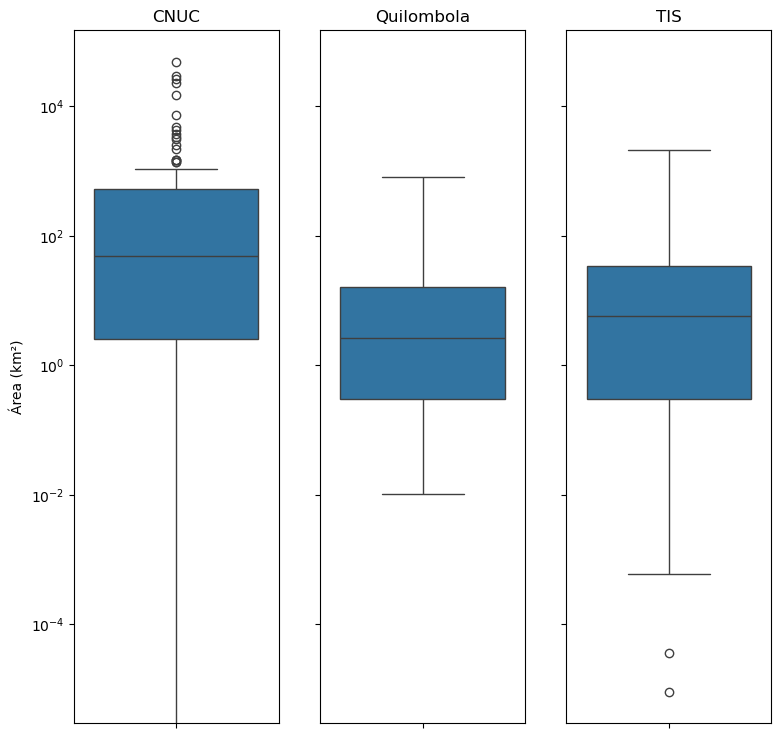

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(9, 9), sharey=True)

sns.set_style("whitegrid")

sns.boxplot(cnuc, y="area_sigef_km2", ax=axes[0])
axes[0].set_title("CNUC")
axes[0].set_ylabel("Área (km²)")
axes[0].set_yscale('log')

sns.boxplot(quilombola, y="area_sigef_km2", ax=axes[1])
axes[1].set_title("Quilombola")
axes[1].set_ylabel("Área (km²)")

sns.boxplot(tis, y="area_sigef_km2", ax=axes[2])
axes[2].set_title("TIS")
axes[2].set_ylabel("Área (km²)")

fig.show()

/tmp/ipykernel_13371/1376393022.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


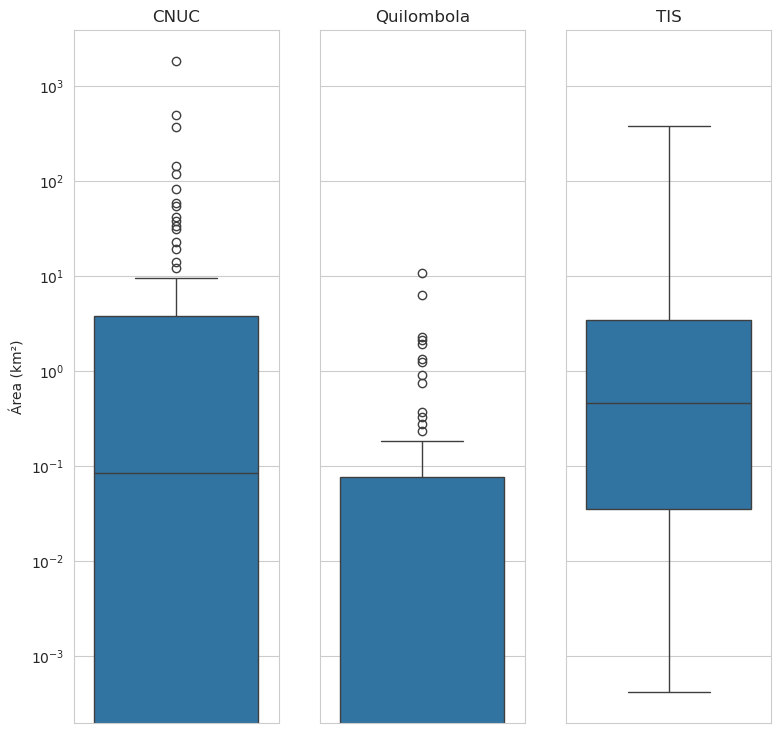

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(9, 9), sharey=True)

sns.set_style("whitegrid")

sns.boxplot(cnuc, y="a_alertas_km2", ax=axes[0])
axes[0].set_title("CNUC")
axes[0].set_ylabel("Área (km²)")

sns.boxplot(quilombola, y="a_alertas_km2", ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title("Quilombola")
axes[1].set_ylabel("Área (km²)")

sns.boxplot(tis, y="a_alertas_km2", ax=axes[2])
axes[2].set_title("TIS")
axes[2].set_ylabel("Área (km²)")

fig.show()

/tmp/ipykernel_13371/2259134656.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


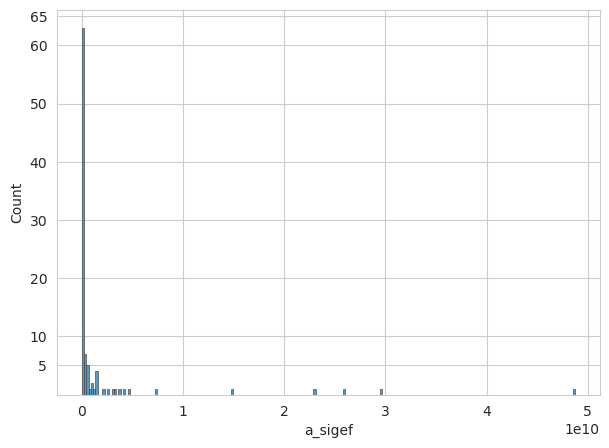

In [17]:
f, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    cnuc,
    x="a_sigef",
    edgecolor=".3",
    linewidth=.5
)

ax.set_yticks([5, 10,  20,  30,  40,  50,  60, 65])
f.show()

In [10]:
cnuc.sort_values("area_sigef_km2", ascending=False).head(5)

,nome_uc,ha_total,uf,municipio,situacao,a_sigef,c_sigef,a_alertas,c_alertas,geometry,area_sigef_km2,a_alertas_km2
25,ÁREA DE PROTEÇÃO AMBIENTAL DO ARQUIPÉLAGO DO M...,4524746.89,PARÁ,"afua , anajas , breves , cachoeira do arari , ...",Ativo,4.871608e+10,7305,1.413882e+07,626,"MULTIPOLYGON (((-51.01778 -0.83416, -51.01729 ...",48716.078169,14.138818
40,FLORESTA ESTADUAL DO PARU,3610013.42,PARÁ,"alenquer , almeirim , monte alegre , obidos",Ativo,2.961114e+10,487,3.924614e+06,44,"MULTIPOLYGON (((-54.49512 -1.15571, -54.49513 ...",29611.135317,3.924614
94,ESTAÇÃO ECOLÓGICA DA TERRA DO MEIO,3373111.24,PARÁ,"altamira , sao felix do xingu",Ativo,2.585186e+10,247,1.177972e+08,423,"POLYGON ((-52.98983 -5.48073, -52.99272 -5.481...",25851.858773,117.797232
41,ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU,1679623.65,PARÁ,"altamira , sao felix do xingu",Ativo,2.300491e+10,3382,1.810395e+09,2960,"POLYGON ((-52.75802 -6.07755, -52.75614 -6.076...",23004.908674,1810.394948
18,ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS,2040313.63,PARÁ,"itaituba , jacareacanga , novo progresso , tra...",Ativo,1.484493e+10,1011,3.696307e+08,3031,"MULTIPOLYGON (((-57.63393 -6.12859, -57.63381 ...",14844.928463,369.630673


In [11]:
cnuc.sort_values("a_alertas_km2", ascending=False).head(5)

,nome_uc,ha_total,uf,municipio,situacao,a_sigef,c_sigef,a_alertas,c_alertas,geometry,area_sigef_km2,a_alertas_km2
41,ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU,1679623.65,PARÁ,"altamira , sao felix do xingu",Ativo,2.300491e+10,3382,1.810395e+09,2960,"POLYGON ((-52.75802 -6.07755, -52.75614 -6.076...",23004.908674,1810.394948
16,FLORESTA NACIONAL DO JAMANXIM,1301551.62,PARÁ,"itaituba , novo progresso",Ativo,7.264551e+09,454,4.967942e+08,646,"POLYGON ((-55.76796 -6.35064, -55.68677 -6.354...",7264.551137,496.794176
18,ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS,2040313.63,PARÁ,"itaituba , jacareacanga , novo progresso , tra...",Ativo,1.484493e+10,1011,3.696307e+08,3031,"MULTIPOLYGON (((-57.63393 -6.12859, -57.63381 ...",14844.928463,369.630673
74,FLORESTA NACIONAL DE ALTAMIRA,725418.14,PARÁ,"altamira , itaituba , trairao",Ativo,3.791692e+08,54,1.453858e+08,278,"POLYGON ((-54.91714 -5.4026, -54.66689 -6.3180...",379.169202,145.385838
94,ESTAÇÃO ECOLÓGICA DA TERRA DO MEIO,3373111.24,PARÁ,"altamira , sao felix do xingu",Ativo,2.585186e+10,247,1.177972e+08,423,"POLYGON ((-52.98983 -5.48073, -52.99272 -5.481...",25851.858773,117.797232


In [26]:
alertas = gpd.read_file("areas-PA/area-alertas-filtrado/alertas_pa/alertas_pa_filtrado.shp")
alertas.sample(5)

/home/toledo-cia/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: areas-PA/area-alertas-filtrado/alertas_pa/alertas_pa_filtrado.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


,CODEALERTA,FONTE,BIOMA,ESTADO,MUNICIPIO,AREAHA,ANODETEC,DATADETEC,DTIMGANT,DTIMGDEP,DTPUBLI,VPRESSAO,geometry
51611,499862,{SIRADX},Amazônia,PARÁ,ourilandia do norte,2.56,2021.0,2021-08-01,2021-06-01,2021-08-29,2022-01-31,ilegal_mining,"MULTIPOLYGON (((-50.84667 -7.23251, -50.84676 ..."
76976,772101,{PRODES-AMZ},Amazônia,PARÁ,acara,16.75,2021.0,2021-08-02,2018-07-31,2018-10-28,2023-01-02,agriculture,"MULTIPOLYGON (((-48.22699 -1.76917, -48.22714 ..."
95396,1290692,{SIRADX},Amazônia,PARÁ,sao felix do xingu,1.33,2024.0,2024-06-01,2024-05-08,2024-06-16,2024-10-03,agriculture,"POLYGON ((-52.41594 -6.21484, -52.41631 -6.214..."
71978,353763,{PRODES-AMZ},Amazônia,PARÁ,oriximina,4.27,2020.0,2020-01-01,2020-07-13,2020-11-29,2021-07-20,agriculture,"POLYGON ((-55.68255 -1.77665, -55.68209 -1.776..."
14378,123173,{SAD},Amazônia,PARÁ,trairao,3.28,2020.0,2020-01-01,2019-07-20,2020-03-17,2020-05-25,agriculture,"POLYGON ((-55.80283 -4.84283, -55.80255 -4.843..."


In [25]:
sigef = gpd.read_file("areas-PA/area-imovel-filtrado/sigef_pa/sigef_pa_filtrado.shp")
sigef.sample(5) 

,cod_imovel,ind_tipo,municipio,num_area,geometry
155198,PA-1502301-F622C31EDBE04302B40E7519C18FB18E,IRU,capitao poco,7.4584,"POLYGON ((-47.25752 -2.2487, -47.25893 -2.2487..."
168015,PA-1504208-957685C54DC04FE99A79CFF08C2C72EE,IRU,maraba,51.4709,"POLYGON ((-50.02135 -5.42258, -50.03033 -5.418..."
137683,PA-1507300-446279C8DA094D6692E99C54ED4D8405,IRU,sao felix do xingu,36.8819,"POLYGON ((-51.93315 -6.52763, -51.93358 -6.527..."
166769,PA-1504505-3F7E61F898B149099AF664C8ED5DB1A6,IRU,melgaco,40.3205,"POLYGON ((-51.23144 -1.32581, -51.23473 -1.317..."
138176,PA-1508001-40DB54371C454FDD9D2EB73CC939F929,IRU,tome-acu,40.1379,"POLYGON ((-48.41154 -2.44854, -48.41862 -2.450..."


In [23]:
cnuc_selec = ["ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU", "ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS", "ESTAÇÃO ECOLÓGICA DA TERRA DO MEIO"]
cnuc_final = cnuc[cnuc["nome_uc"].isin(cnuc_selec)]
cnuc_final = cnuc_final.drop(columns=["a_sigef", "a_alertas"])
cnuc_final.rename(columns={"area_sigef_km2": "sigef_km2", "a_alertas_km2": "alerta_km2"}, inplace=True)
cnuc_final.to_file("areas-PA/áreas-selecionadas/cnuc/cnuc.shp")

In [28]:
from pyproj import Geod

sigef["is_in"] = 0
alertas["is_in"] = 0

for i, row in cnuc_final.iterrows():
    geod = Geod(ellps="WGS84")
    muns = set() # Armazenando em um conjunto porque não queremos municípios repetidos
    for k in row["municipio"].split(" , "): # Iterando na lista, podendo ser uma lista de apenas um município
        muns.add(k.strip()) # Removendo espaços, e colocando ele no conjunto
    for j, row_j in sigef[sigef["municipio"].isin(muns)].iterrows(): # iterando na base, e filtrando apenas com os municípios que estão na linha da iteração CNUC
            geod_area = abs(geod.geometry_area_perimeter(row["geometry"].intersection(row_j["geometry"]))[0]) # Calculando a área de interseção entre as geometrias, e somando a área
            if geod_area > 0:
                sigef.at[j, "is_in"] = 1

    for j, row_j in alertas[alertas["MUNICIPIO"].isin(muns)].iterrows(): # iterando na base, e filtrando apenas com os municípios que estão na linha da iteração CNUC
        geod_area = abs(geod.geometry_area_perimeter(row["geometry"].intersection(row_j["geometry"]))[0]) # Calculando a área de interseção entre as geometrias, e somando a área
        if geod_area > 0:
           alertas.at[j, "is_in"] = 1

sigef_final = sigef[sigef["is_in"] == 1]
alertas_final = alertas[alertas["is_in"] == 1]

In [31]:
sigef_final.drop(columns=["is_in"], inplace=True)
alertas_final.drop(columns=["is_in"], inplace=True)

sigef_final.to_file("areas-PA/áreas-selecionadas/sigef/sigef.shp")
alertas_final.to_file("areas-PA/áreas-selecionadas/alertas/alertas.shp")

/tmp/ipykernel_13371/2323944716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigef_final.drop(columns=["is_in"], inplace=True)
/tmp/ipykernel_13371/2323944716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertas_final.drop(columns=["is_in"], inplace=True)
/home/toledo-cia/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Field DATADETEC create as date field, though DateTime requested.
  ogr_write(
/home/toledo-cia/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Field DTIMGANT create as date field, though DateTime requested.
  ogr_write(
/home/toledo-cia/